**Installation and Dependencies**

https://github.com/AminHP/gym-anytrading

AnyTrading is a collection of OpenAI Gym environments for reinforcement learning-based trading algorithms.Trading algorithms are mostly implemented in two markets: FOREX and Stock. AnyTrading aims to provide some Gym environments to improve and facilitate the procedure of developing and testing RL-based algorithms in this area. This purpose is obtained by implementing three Gym environments: TradingEnv, ForexEnv, and StocksEnv.TradingEnv is an abstract environment which is defined to support all kinds of trading environments. ForexEnv and StocksEnv are simply two environments that inherit and extend TradingEnv. In the future sections, more explanations will be given about them but before that, some environment properties should be discussed.


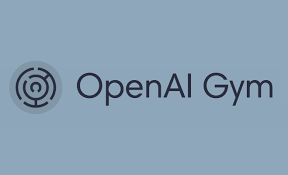

In [ ]:
!pip install gym-anytrading

     |████████████████████████████████| 171 kB 4.4 MB/s 


Stable Baselines is a set of improved implementations of reinforcement learning algorithms based on OpenAI Baselines.

https://github.com/hill-a/stable-baselines

These algorithms will make it easier for the research community and industry to replicate, refine, and identify new ideas, and will create good baselines to build projects on top of. We expect these tools will be used as a base around which new ideas can be added, and as a tool for comparing a new approach against existing ones.

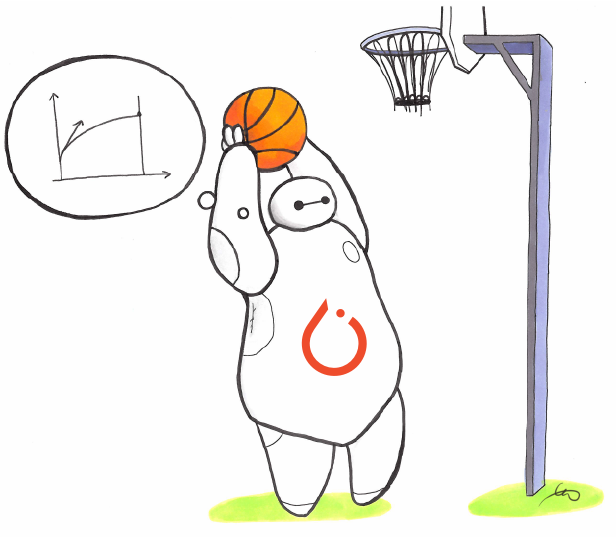

In [ ]:
!pip install stable-baselines3

     |████████████████████████████████| 176 kB 4.4 MB/s 


In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 3.8 MB 30.4 MB/s 
     |████████████████████████████████| 50 kB 4.4 MB/s 
     |████████████████████████████████| 503 kB 39.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=0138d7e2165c1af223f85dd2904de45d114fe17a3e7870969be12ec9157f9977
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [ ]:
import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Preprocessing the Data**

Data Can be held from Market Search Website.
https://www.marketwatch.com/investing/index/spx/download-data?mod=mw_quote_tab

Collected Data for the parameters of S&P 500 Index i.e [Open ,High, Low,Close]

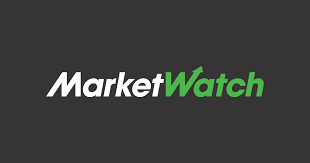


In [7]:
Stock_data = pd.read_csv('/content/S&P 500.csv')

In [8]:
Stock_data.head()

,Date,Open,High,Low,Close
0,02/28/2022,"4,354.17","4,388.84","4,315.12","4,373.94"
1,02/25/2022,"4,298.38","4,385.34","4,286.83","4,384.65"
2,02/24/2022,"4,155.77","4,294.73","4,114.65","4,288.70"
3,02/23/2022,"4,324.93","4,341.51","4,221.51","4,225.50"
4,02/22/2022,"4,332.74","4,362.12","4,267.11","4,304.76"


In [9]:
Stock_data.shape

(253, 5)

In [10]:
Stock_data['Date'] = pd.to_datetime(Stock_data['Date'])

In [11]:
Stock_data.sort_values('Date', ascending = True, inplace=True)

In [12]:
Stock_data.head()

,Date,Open,High,Low,Close
252,2021-03-01,"3,842.51","3,914.50","3,842.51","3,901.82"
251,2021-03-02,"3,903.64","3,906.41","3,868.57","3,870.29"
250,2021-03-03,"3,863.99","3,874.47","3,818.86","3,819.72"
249,2021-03-04,"3,818.53","3,843.67","3,723.34","3,768.47"
248,2021-03-05,"3,793.58","3,851.69","3,730.19","3,841.94"


In [13]:
Stock_data.set_index('Date',inplace=True)

In [14]:
Stock_data

,Open,High,Low,Close
Date,,,,
2021-03-01,"3,842.51","3,914.50","3,842.51","3,901.82"
2021-03-02,"3,903.64","3,906.41","3,868.57","3,870.29"
2021-03-03,"3,863.99","3,874.47","3,818.86","3,819.72"
2021-03-04,"3,818.53","3,843.67","3,723.34","3,768.47"
2021-03-05,"3,793.58","3,851.69","3,730.19","3,841.94"
...,...,...,...,...
2022-02-22,"4,332.74","4,362.12","4,267.11","4,304.76"
2022-02-23,"4,324.93","4,341.51","4,221.51","4,225.50"
2022-02-24,"4,155.77","4,294.73","4,114.65","4,288.70"


In [15]:
#To remove "," at stok points
Stock_data['Open'] = Stock_data['Open'].apply(lambda x: float(x.replace(',','')))       
Stock_data['High'] = Stock_data['High'].apply(lambda x: float(x.replace(',','')))
Stock_data['Low'] = Stock_data['Low'].apply(lambda x: float(x.replace(',','')))
Stock_data['Close'] = Stock_data['Close'].apply(lambda x: float(x.replace(',','')))

In [16]:
Stock_data

,Open,High,Low,Close
Date,,,,
2021-03-01,3842.51,3914.50,3842.51,3901.82
2021-03-02,3903.64,3906.41,3868.57,3870.29
2021-03-03,3863.99,3874.47,3818.86,3819.72
2021-03-04,3818.53,3843.67,3723.34,3768.47
2021-03-05,3793.58,3851.69,3730.19,3841.94
...,...,...,...,...
2022-02-22,4332.74,4362.12,4267.11,4304.76
2022-02-23,4324.93,4341.51,4221.51,4225.50
2022-02-24,4155.77,4294.73,4114.65,4288.70


**Setting Environment**

https://github.com/AminHP/gym-anytrading

Create an environment with custom parameters
 custom_env = gym.make('stocks-v0',
                df = df,
                window_size = 10,
               frame_bound = (10, 300))
It is to be noted that the first element of frame_bound should be greater than or equal to window_size.

So we will use the stocks V0 environment we're going to pass in our data frame and and we're going to pass it in by setting df parameter equal to the dataframe. that we created above here. OK, the next parameter is frame bound and we're going to set this equal from day five to day two hundred.And so we want to leave out fifty rows of our data so that we can test our model on data points that so we can do five to two hundred.And this is just essentially just the days that we want to train our model on.And you can think of the data frame as the environment.And what we're trying to do is maximize our profits by buying and selling.And finally, the last parameter is the window size.And so this is simply just the amount of days that our model will take into consideration to make its buy and sell signal.So let's say we're on day five here.We're going to look at these last five days.And if the stock is increasing on each of these days, maybe our model will learn that it needs to sell the stock now because it's continuously increasing.And so it might be a good time to sell.So this just means the amount of days that we take into consideration for each buy and sell signal.

In [19]:
env = gym.make('stocks-v0', df=Stock_data, frame_bound = (5,200), window_size=5 )


In [20]:
env.signal_features

array([[ 3.90182e+03,  0.00000e+00],
       [ 3.87029e+03, -3.15300e+01],
       [ 3.81972e+03, -5.05700e+01],
       [ 3.76847e+03, -5.12500e+01],
       [ 3.84194e+03,  7.34700e+01],
       [ 3.82135e+03, -2.05900e+01],
       [ 3.87544e+03,  5.40900e+01],
       [ 3.89881e+03,  2.33700e+01],
       [ 3.93934e+03,  4.05300e+01],
       [ 3.94334e+03,  4.00000e+00],
       [ 3.96894e+03,  2.56000e+01],
       [ 3.96271e+03, -6.23000e+00],
       [ 3.97412e+03,  1.14100e+01],
       [ 3.91546e+03, -5.86600e+01],
       [ 3.91310e+03, -2.36000e+00],
       [ 3.94059e+03,  2.74900e+01],
       [ 3.91052e+03, -3.00700e+01],
       [ 3.88914e+03, -2.13800e+01],
       [ 3.90952e+03,  2.03800e+01],
       [ 3.97454e+03,  6.50200e+01],
       [ 3.97109e+03, -3.45000e+00],
       [ 3.95855e+03, -1.25400e+01],
       [ 3.97289e+03,  1.43400e+01],
       [ 4.01987e+03,  4.69800e+01],
       [ 4.07791e+03,  5.80400e+01],
       [ 4.07394e+03, -3.97000e+00],
       [ 4.07995e+03,  6.01000e+00],
 

In [21]:
len(env.signal_features)

200

In [22]:
env.action_space

Discrete(2)

Here Discrete(2) indicates two actions i.e buy and  sell or long and short

**State of Environment**

{'total_reward': 642.5300000000016, 'total_profit': 0.5815789777661491, 'position': 1}


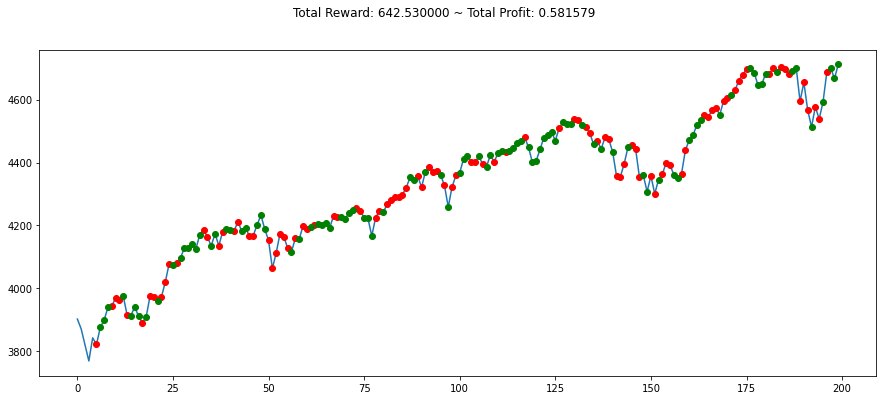

In [23]:
state = env.reset()

while True:
  action = env.action_space.sample()
  next_state, reward, done, info = env.step(action)

  if done:
    print(info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Here red indicates short and green indicates long variation of stocks

https://github.com/AminHP/gym-anytrading


**Final Training**

https://github.com/araffin/rl-baselines-zoo

Set up Environment and set up model...We choose now here A2C i.e Actor 2 Critic

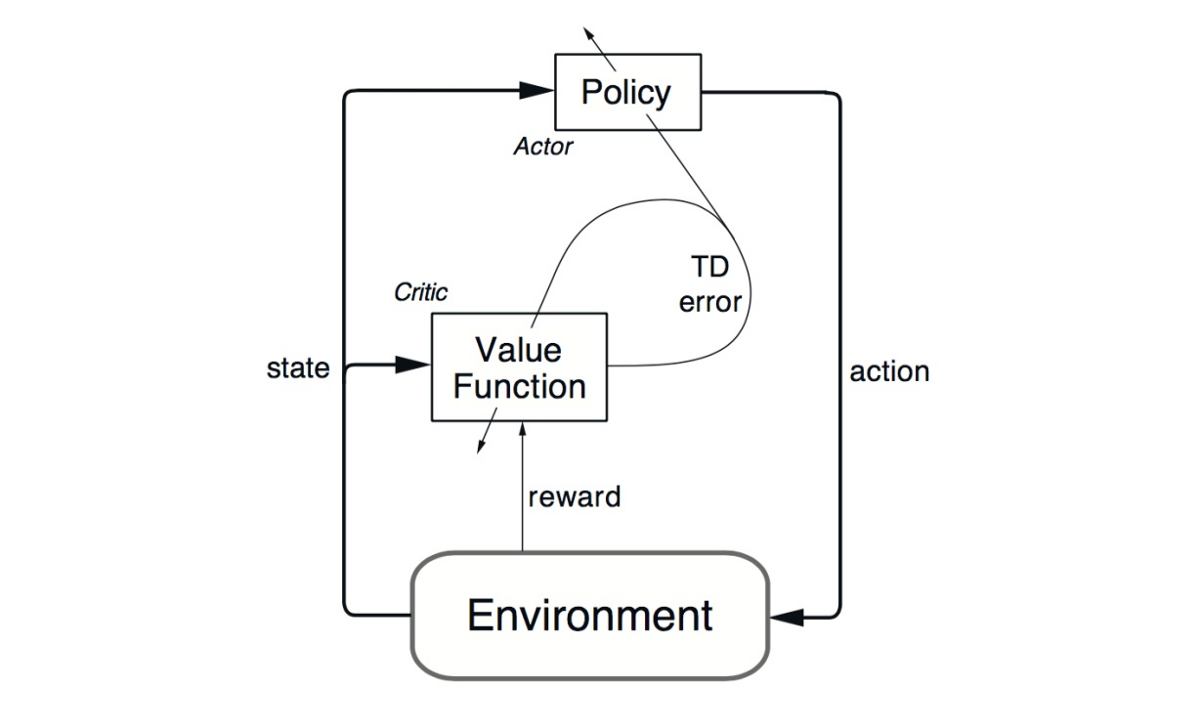

In [30]:
#Create environment once again as new with lambda function for training
env = lambda: gym.make('stocks-v0', df=Stock_data, frame_bound = (5,200), window_size=5 )

In [31]:
env = DummyVecEnv([env])

In [32]:
#Create Model

model = A2C('MlpLstmPolicy',env,verbose = 1)

In [33]:
#Model_learning
model.learn(total_timesteps = 100000)

---------------------------------
| explained_variance | -0.00445 |
| fps                | 11       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 303      |
---------------------------------
---------------------------------
| explained_variance | -6.6e-05 |
| fps                | 223      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 49.4     |
---------------------------------
---------------------------------
| explained_variance | 8.26e-05 |
| fps                | 262      |
| nupdates           | 200      |
| policy_entropy     | 0.691    |
| total_timesteps    | 1000     |
| value_loss         | 144      |
---------------------------------
---------------------------------
| explained_variance | 0.000299 |
| fps                | 291      |
| nupdates           | 300      |
| policy_entropy     | 0.691    |
| total_timest

**Testing the Model Learning:**

In [34]:
env = gym.make('stocks-v0', df=Stock_data, frame_bound = (200,253), window_size=5 )     # frame_bound is now set to remainings

In [35]:
obs = env.reset()

while True:
  obs = obs[np.newaxis,...]
  action, states = model.predict(obs)
  obs, rewards, done, info = env.step(action)

  if done:
    print(info)
    break

{'total_reward': -405.85999999999876, 'total_profit': 0.7856716567195722, 'position': 0}


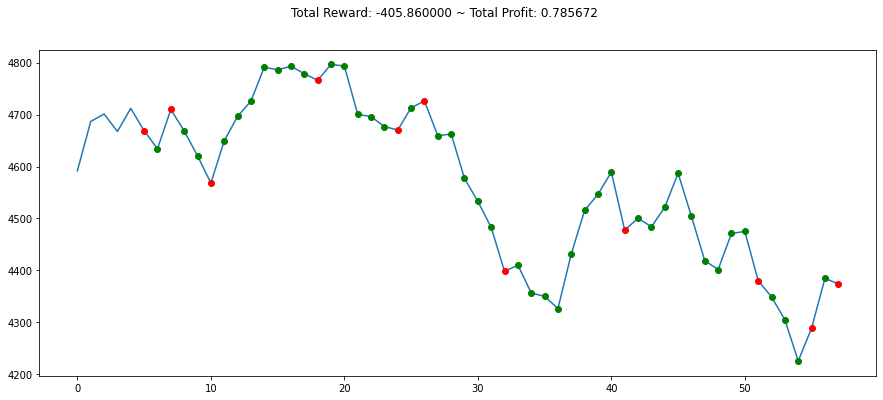

In [36]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

**Inference:**
       Total Profit should come above 1 fo gain money...Here we are loosing the money...There are certain strategies we will try to have this total profit to be more than one.....